Liste des questions : (foire aux idées)
Idée générale : autopsie d'une fusillade aux états unis 

 I Typologie des victimes
     --> age (ok), bléssés, décès
     --> ethnie des victimes
     --> présence ou non d'une force de sécurité dans l'établissement ? 
 
 II Typologie de ou des attaquants
     --> age, sexe, ethnie ?
     --> lien avec l'école attaquée
     --> qu'est ce qu'il est devenu après?
 
 III Typologie de l'attaque
     --> lieu / horaire : état, type d'école, horaire du passage à l'acte, jour
     --> type de fusillage : accidentelle ou non 
     --> arme et provenance de l'arme
     --> attaque individuelle ou collective
     --> présence ou non d'une force de sécurité dans l'établissement ? 
 
 IV Vue d'ensemble
     --> regroupement dans le temps des attaques (par rapport aux états) : est ce que les attaques dans un même état sont dans une capsule temporelle ? 
     --> états attaqués (à mettre en relation avec la densité et / ou le nombre d'école dans l'état)
     --> école ciblée : grade , sécurité , nombre de boursiers

Importer les packadges : folium

In [22]:
import pandas as pd
import geopandas as gpd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap

Importer le data frame

In [23]:
nom_fichier = "/home/coline/Documents/Etudes/ISUP/Master2/Semestre1/Visualisation de données/school-shootings-data.csv"

df =pd.read_csv(nom_fichier)

# I Typologie des victimes

## Age : classe d'age des écoles visées

KG = Kinder Garden --> age d'entrée 5 ans 
PK = Pre Kinder Garden : entre 3 et 5 ans
Comme KG et PK sont uniquement dans low_grade on les remplace respectivement par 5 ans et 3 ans 

Attention ce ne sont pas les âges mais les grades --> à transformer en age

Elementary School   grade 5 (10/11)
Junior High School 6 - 8
High School  > 8 (13/14)
Pour les NA --> à voir

/tmp/ipykernel_100520/1929427786.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_victimes['low_grade']  = df_age_victimes['low_grade'].replace(low_remplacement)
/tmp/ipykernel_100520/1929427786.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_victimes['high_grade']  = df_age_victimes['high_grade'].replace(high_remplacement)
/tmp/ipykernel_100520/1929427786.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

14-18    211
11-14     32
3-11      16
5-11      14
12-18     11
13-18     10
11-18     10
12-14      8
3-14       8
3-12       7
3-18       7
5-12       7
5-18       6
3-13       3
5-14       3
10-14      3
8-18       3
12-15      3
16-18      2
11-13      2
14-17      2
5-10       2
11-15      1
14-16      1
3-10       1
8-10       1
3-5        1
6-12       1
15-18      1
9-12       1
11-16      1
Name: classe_age, dtype: int64
+-----------+------------+------------+-------------------------------------------------+
| low_grade | high_grade | classe_age |                      Ecole                      |
+-----------+------------+------------+-------------------------------------------------+
|    14     |     18     |   14-18    |                   High School                   |
|    14     |     18     |   14-18    |                   High School                   |
|    14     |     18     |   14-18    |                   High School                   |
|    11     |     13     |

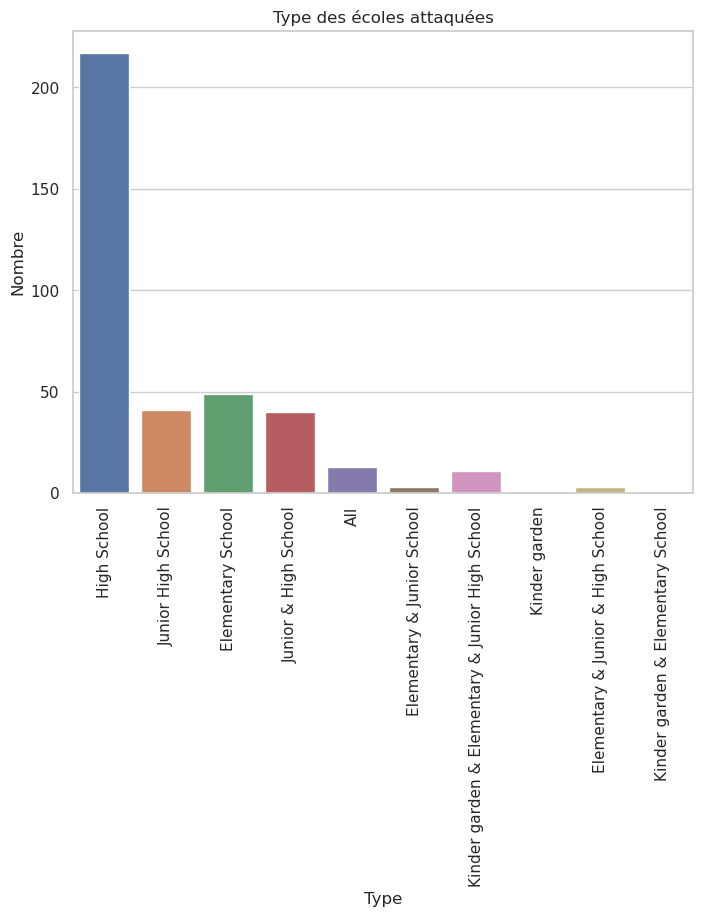

In [46]:
df_age_victimes = df[["low_grade", "high_grade"]]

# Remplacement des grades par l'age d'entrée  ou age de sortie

low_remplacement= {'PK': '3', 'KG': '5', 'K':'5', '1':'6', '2':'7', '3':'8', '4':'9', '5':'10', '6':'11',
                     '7':'12', '8':'13', '9':'14', '10':'15', '11':'16', '12':'17' }
high_remplacement = {'PK': '5', 'KG': '6', 'K':'6', '1':'7', '2':'8', '3':'9', '4':'10', '5':'11', '6':'12',
                     '7':'13', '8':'14', '9':'15', '10':'16', '11':'17', '12':'18' }
ecole_remplacement = {'14-18':'High School', 
                      '11-14':'Junior High School',
                      '3-11' : 'Elementary School',
                      '5-11' : 'Elementary School', 
                      '12-18': 'Junior & High School',
                      '13-18':'Junior & High School',     
                      '11-18':'Junior & High School',     
                      '12-14':'Junior & High School', 
                      '3-14' : 'Kinder garden & Elementary & Junior High School',
                      '3-12' : 'Elementary School', 
                      '3-18' : 'All', 
                      '5-12': 'Elementary School', 
                      '5-18' : 'All',
                      '3-13' : 'Kinder garden & Elementary & Junior High School', 
                      '5-14' : 'Elementary & Junior School',
                      '10-14' : 'Junior High School',     
                      '8-18' : 'Elementary & Junior & High School',     
                      '12-15' : 'Junior High School',     
                      '16-18':'High School',      
                      '11-13' : 'Junior High School',    
                      '14-17':'High School',      
                      '5-10':'Elementary School',       
                      '11-15':'Junior High School',      
                      '14-16':'High School',      
                      '3-10':'Kinder garden & Elementary School',       
                      '8-10':'Elementary School',       
                      '3-5':'Kinder garden',        
                      '6-12': 'Elementary School',      
                      '15-18':'High School',     
                      '9-12':'Elementary School',       
                      '11-16':'Junior & High School',
                      'nan' : 'NA'
                     }

# Utilisez la méthode replace() pour effectuer le remplacement
df_age_victimes['low_grade']  = df_age_victimes['low_grade'].replace(low_remplacement)
df_age_victimes['high_grade']  = df_age_victimes['high_grade'].replace(high_remplacement)

df_age_victimes['classe_age'] = df_age_victimes['low_grade'] + "-" + df_age_victimes['high_grade']
print(df_age_victimes['classe_age'].value_counts())

df_age_victimes['Ecole'] = df_age_victimes['classe_age'].replace(ecole_remplacement)

table = tabulate(df_age_victimes, headers='keys', tablefmt='pretty', showindex=False)
print(table)


# Configurez le style de Seaborn (facultatif, mais peut rendre le graphique plus attrayant).
sns.set(style="whitegrid")

# Créez le barplot avec Seaborn.
plt.figure(figsize=(8, 6))  # Définissez la taille du graphique (facultatif).
ax = sns.countplot(x='Ecole', data=df_age_victimes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #Place les étiquettes d'état à la verticale
# Ajoutez un titre et des labels d'axe.
plt.xlabel('Type')
plt.ylabel('Nombre')
plt.title('Type des écoles attaquées')

# Affichez le graphique.
plt.show()


# Vrac

## Ou sont situées les écoles ?  --> à comparer avec la taille des états est le nombre d'école

In [3]:
table = tabulate(df[["city", "state", "county"]], headers='keys', tablefmt='pretty', showindex=False)
print(table)

+-----------------------+----------------------+-------------------------+
|         city          |        state         |         county          |
+-----------------------+----------------------+-------------------------+
|       Littleton       |       Colorado       |     Rockdale County     |
|     Philadelphia      |     Pennsylvania     |   Philadelphia County   |
|        Boston         |    Massachusetts     |     Suffolk County      |
|        Deming         |      New Mexico      |       Luna County       |
|      Fort Gibson      |       Oklahoma       |     Muskogee County     |
|    New Port Richey    |       Florida        |      Pasco County       |
|        Merced         |      California      |      Merced County      |
|        Chicago        |       Illinois       |       Cook County       |
|       Horn Lake       |     Mississippi      |      DeSoto County      |
|       Tecumseh        |       Oklahoma       |   Pottawatomie County   |
| Mount Morris Township |

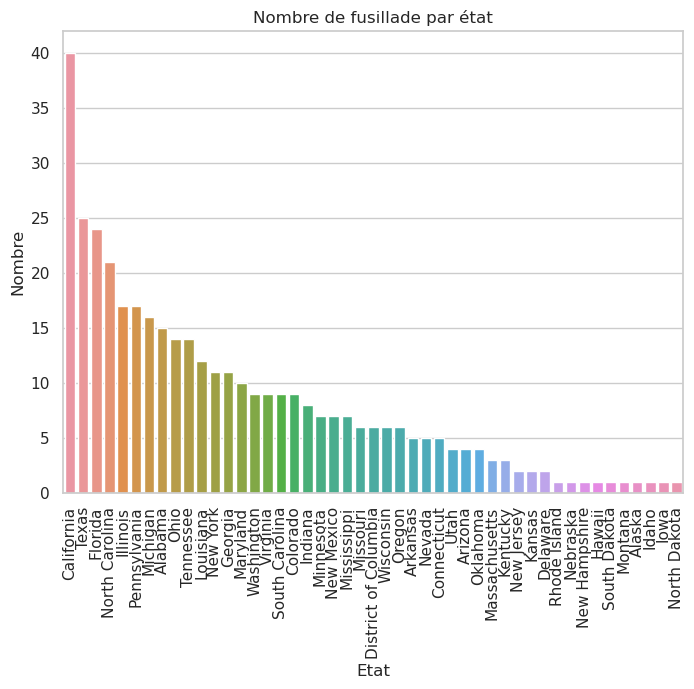

In [4]:
# Configurez le style de Seaborn (facultatif, mais peut rendre le graphique plus attrayant).
order = df['state'].value_counts().index
sns.set(style="whitegrid")

# Créez le barplot avec Seaborn.
plt.figure(figsize=(8, 6))  # Définissez la taille du graphique (facultatif).
ax = sns.countplot(x='state', data=df, order = order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #Place les étiquettes d'état à la verticale
# Ajoutez un titre et des labels d'axe.
plt.xlabel('Etat')
plt.ylabel('Nombre')
plt.title('Nombre de fusillade par état')

# Affichez le graphique.
plt.show()


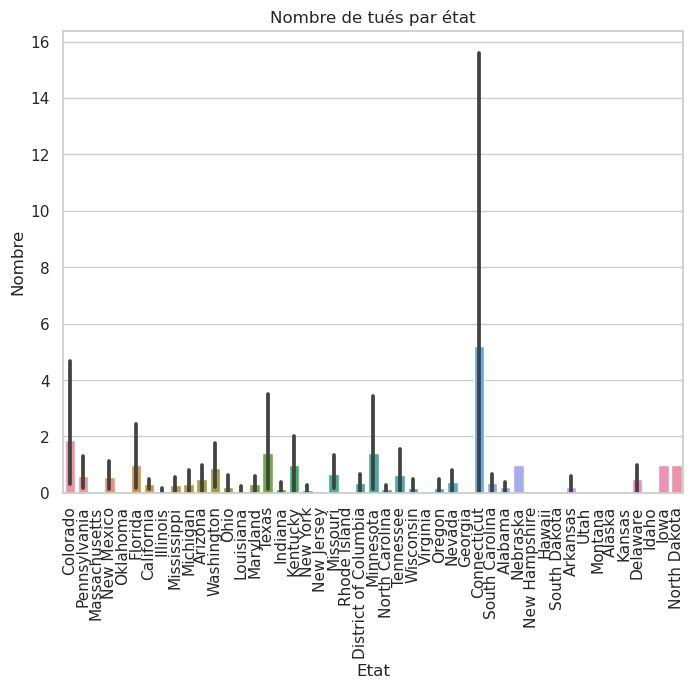

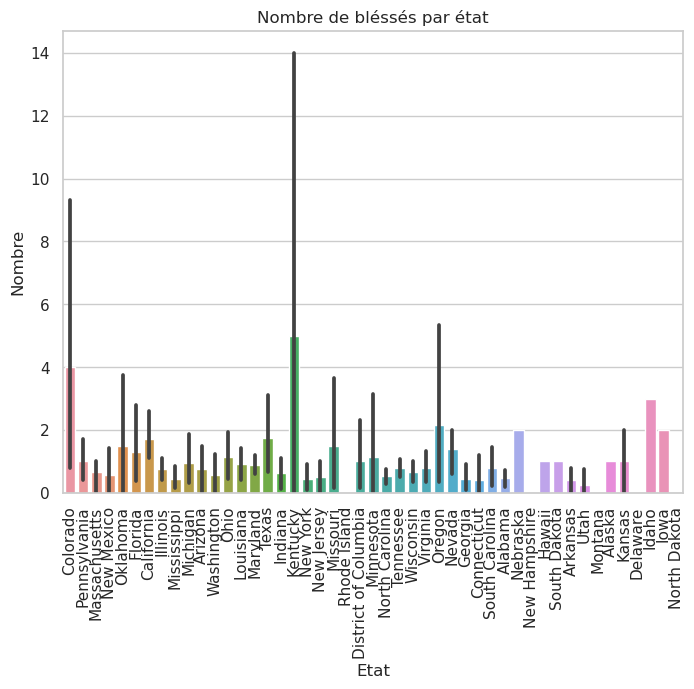

In [5]:
# Configurez le style de Seaborn (facultatif, mais peut rendre le graphique plus attrayant).
sns.set(style="whitegrid")

# Créez le barplot avec Seaborn.
plt.figure(figsize=(8, 6))  # Définissez la taille du graphique (facultatif).
ax = sns.barplot(x='state',y="killed", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #Place les étiquettes d'état à la verticale
# Ajoutez un titre et des labels d'axe.
plt.xlabel('Etat')
plt.ylabel('Nombre')
plt.title('Nombre de tués par état')

# Affichez le graphique.
plt.show()


# Configurez le style de Seaborn (facultatif, mais peut rendre le graphique plus attrayant).
sns.set(style="whitegrid")

# Créez le barplot avec Seaborn.
plt.figure(figsize=(8, 6))  # Définissez la taille du graphique (facultatif).
ax = sns.barplot(x='state',y="injured", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #Place les étiquettes d'état à la verticale
# Ajoutez un titre et des labels d'axe.
plt.xlabel('Etat')
plt.ylabel('Nombre')
plt.title('Nombre de bléssés par état')

# Affichez le graphique.
plt.show()

In [7]:
# Créez une carte centrée sur les États-Unis
usa_map = folium.Map(location=[38.8951100, -77.0363700], zoom_start=4)
df =pd.read_csv(nom_fichier)
table = tabulate(df[["school_name","lat", "long", "year"]], headers='keys', tablefmt='pretty', showindex=False)
print(table)
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)



for index, row in df.iterrows():
    folium.Marker([row['lat'], row['long']], tooltip=row['year']).add_to(usa_map)
usa_map

# Créez une carte centrée sur les États-Unis
usa_map = folium.Map(location=[38.8951100, -77.0363700], zoom_start=4)
df =pd.read_csv(nom_fichier)
table = tabulate(df[["school_name","lat", "long", "year"]], headers='keys', tablefmt='pretty', showindex=False)
print(table)
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
a=df[['lat',"long"]]
print(a)


HeatMap(a).add_to(usa_map)
usa_map

+---------------------------------------------------------+-------------+--------------+------+
|                       school_name                       |     lat     |     long     | year |
+---------------------------------------------------------+-------------+--------------+------+
|                  Columbine High School                  |  33.626922  |  -84.04796   | 1999 |
|                John Bartram High School                 |  39.921509  |  -75.234108  | 1999 |
|                 Dorchester High School                  |  42.285268  |  -71.075901  | 1999 |
|                  Deming Middle School                   |  32.261547  | -107.762986  | 1999 |
|                Fort Gibson Middle School                |  35.795556  |  -95.241921  | 1999 |
|                  Ridgewood High School                  |  28.273253  |  -82.687231  | 2000 |
|             Alicia Reyes Elementary School              |  37.286387  | -120.494808  | 2000 |
|            Duke Ellington Elementary S